<a href="https://colab.research.google.com/github/obotnamnso/Account-Project/blob/main/Real_Estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_excel('real-estate-sales.xlsx')
df.head()

,PropertyID,xrCompositeLandUseID,xrBuildingTypeID,ParcelID,LocationStartNumber,ApartmentUnitNumber,StreetNameAndWay,xrPrimaryNeighborhoodID,LandSF,TotalFinishedArea,LivingUnits,OwnerLastName,OwnerFirstName,PrimaryGrantor,SaleDate,SalePrice,TotalAppraisedValue,LegalReference,xrSalesValidityID,xrDeedID
0,30,3,4.0,144-698-048,22.0,NaN,BRISTOL ST,2,6000.0,1422.0,1.0,KHAN,BIBI,ALI MUNTAAZ,2019-12-10,0,136600,07559-0116,5,8
1,50,3,4.0,121-698-073,164.0,NaN,HOLLYWOOD AVE,2,5650.0,1384.0,1.0,GONZALEZ,LOURDES,GONZALEZ JOHNETTE,2019-12-18,179900,158400,07561-0225,1,10
2,58,3,6.0,121-699-090,87.0,NaN,BRISTOL ST,2,5850.0,1249.0,1.0,SAMPAYO,YARLIS,FLOYD ANNIE J ESTATE,2019-05-24,174900,144400,07485-0035,12,1
3,66,3,6.0,144-699-037,55.0,NaN,BRISTOL ST,2,5900.0,1390.0,1.0,CARRILLO PACHECO,RICARDO,HARGROVE DAVID L,2019-09-10,140000,142400,07523-0330,1,10
4,78,3,3.0,144-699-025,5.0,NaN,BRISTOL ST,2,7788.0,960.0,1.0,VARJABEDIAN ROSE M (L.U.),NaN,VARJABEDIAN ANTHONY ( L U),2020-05-14,0,147900,07616-0064,11,7


In [28]:
df.shape

(4735, 20)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4735 entries, 0 to 4734
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   PropertyID               4735 non-null   int64         
 1   xrCompositeLandUseID     4735 non-null   int64         
 2   xrBuildingTypeID         4719 non-null   float64       
 3   ParcelID                 4735 non-null   object        
 4   LocationStartNumber      4734 non-null   float64       
 5   ApartmentUnitNumber      1474 non-null   object        
 6   StreetNameAndWay         4735 non-null   object        
 7   xrPrimaryNeighborhoodID  4735 non-null   int64         
 8   LandSF                   4165 non-null   float64       
 9   TotalFinishedArea        4536 non-null   float64       
 10  LivingUnits              4719 non-null   float64       
 11  OwnerLastName            4734 non-null   object        
 12  OwnerFirstName           2375 non-

In [30]:
# Remove rows with zero, one or missing SalePrice
df = df[df['SalePrice'] > 1].dropna(subset=['SalePrice', 'SaleDate'])
df.shape

(3107, 20)

In [31]:
df['SalePrice'].value_counts()

,count
SalePrice,
4550000,97
4325000,92
2135000,91
950000,79
3107547,69
...,...
132500,1
113220,1
181000,1


In [7]:
# prompt: display this column df['ALocationStartNumber']

print(df['SaleDate'].max())
print(df['SaleDate'].min())

2020-08-21 00:00:00
2018-08-27 00:00:00


In [32]:
df.columns

Index(['PropertyID', 'xrCompositeLandUseID', 'xrBuildingTypeID', 'ParcelID',
       'LocationStartNumber', 'ApartmentUnitNumber', 'StreetNameAndWay',
       'xrPrimaryNeighborhoodID', 'LandSF', 'TotalFinishedArea', 'LivingUnits',
       'OwnerLastName', 'OwnerFirstName', 'PrimaryGrantor', 'SaleDate',
       'SalePrice', 'TotalAppraisedValue', 'LegalReference',
       'xrSalesValidityID', 'xrDeedID'],
      dtype='object')

In [33]:
# 1 Total Sale per Quarter of the Real Estate
df['Quarter'] = df['SaleDate'].dt.quarter
#df['Quarter'] = df['SaleDate'].dt.to_period('Q').astype(str)
quarterly_sales = df.groupby('Quarter')['SalePrice'].sum()
print(quarterly_sales)

Quarter
1     682912820
2     247882936
3     653169919
4    1887341658
Name: SalePrice, dtype: int64


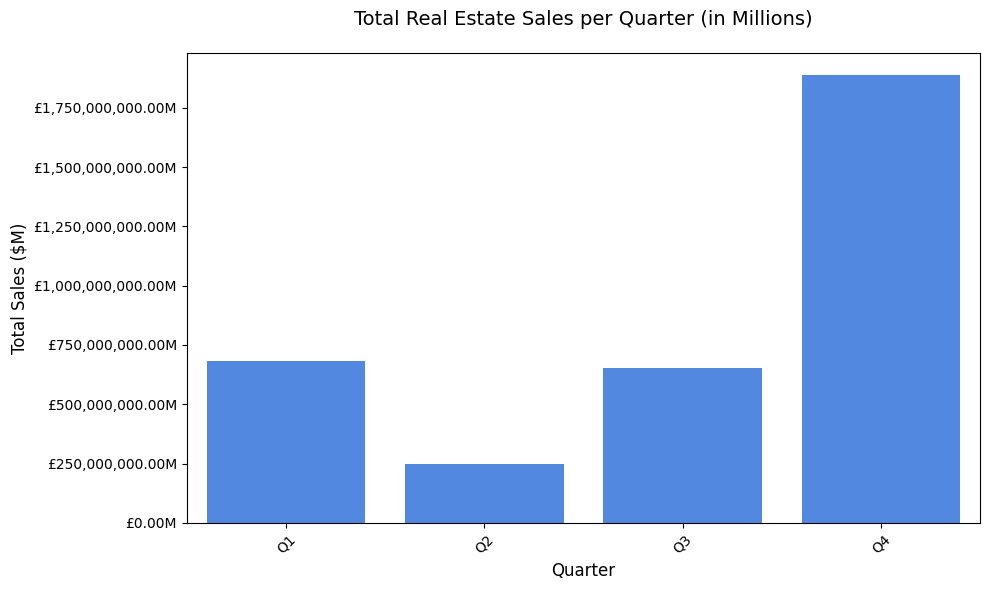

In [34]:
quarters = ['Q1', 'Q2', 'Q3', 'Q4']  # Placeholder;
sale_prices = [682912820, 247882936, 653169919, 1887341658]
quarterly_sales = pd.DataFrame({
    'Quarter': quarters,
    'SalePrice': sale_prices
})

# Create the vertical bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Quarter', y='SalePrice', data=quarterly_sales, color='#3b82f6')
plt.title('Total Real Estate Sales per Quarter (in Millions)', fontsize=14, pad=20)
plt.xlabel('Quarter', fontsize=12)
plt.ylabel('Total Sales ($M)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{x:,.2f}M'))  # Format y-axis
plt.tight_layout()
plt.show()


In [101]:
# Which month has the biggest Sale
df['Month'] = df['SaleDate'].dt.strftime('%B')
monthly_sales = df.groupby('Month')['SalePrice'].sum()
print(monthly_sales)

Month
April          24993048
August         67828661
December     1681501953
February       61777399
January       588351836
July          329201797
June           36785537
March          32783585
May           186104351
November       62141291
October       143698414
September     256139461
Name: SalePrice, dtype: int64


In [102]:
# Ensure months are in chronological order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = monthly_sales.reindex(month_order)

print(monthly_sales)

Month
January       588351836
February       61777399
March          32783585
April          24993048
May           186104351
June           36785537
July          329201797
August         67828661
September     256139461
October       143698414
November       62141291
December     1681501953
Name: SalePrice, dtype: int64


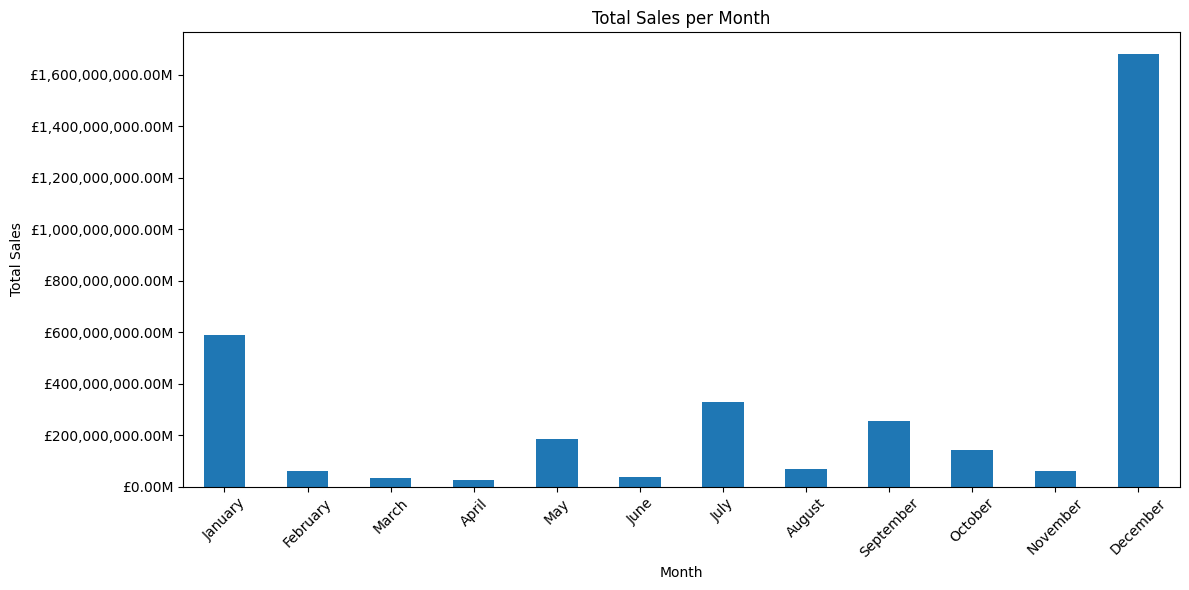

In [103]:

monthly_sales.plot(kind='bar',stacked=True, figsize=(12, 6), colormap='tab20')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'£{x:,.2f}M'))  # Format y-axis
plt.tight_layout()
plt.show()



In [72]:
df['xrDeedID'].unique()

array([10,  1, 11, 19,  2,  9,  4, 18,  0,  5,  8, 12,  3,  7,  6, 13])

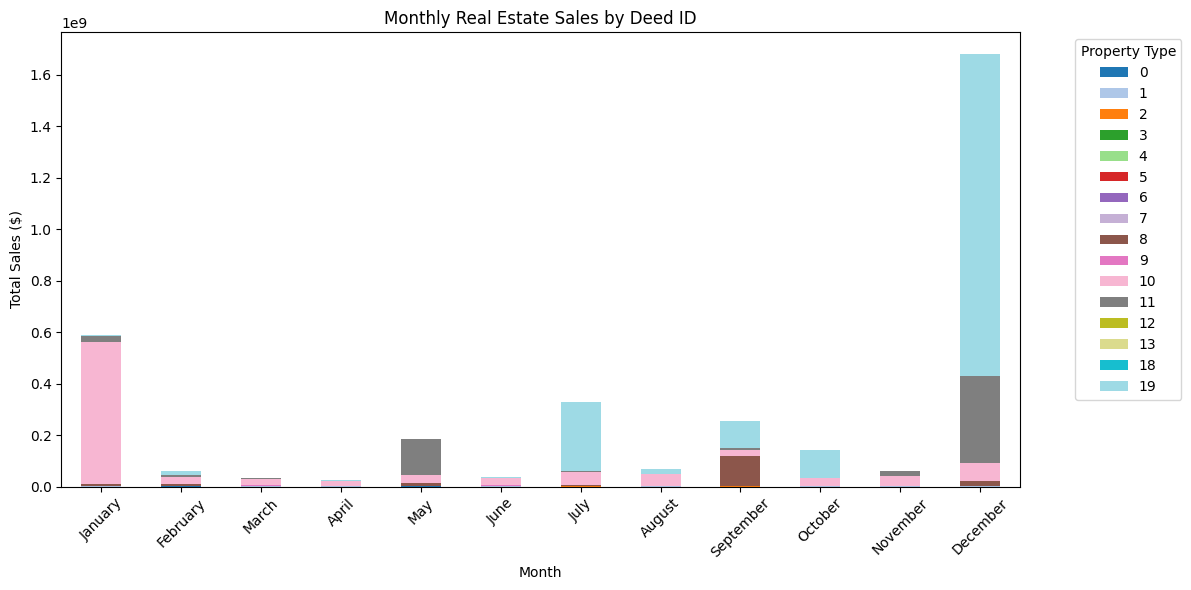

In [104]:
#df['Month'] = df['SaleDate'].dt.strftime('%B')  # Convert month number to month name
monthly_sales = df.pivot_table(values='SalePrice', index='Month', columns='xrDeedID', aggfunc='sum', fill_value=0)

# Ensure months are in the correct order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = monthly_sales.reindex(month_order)

# Plot the stacked bar chart
monthly_sales.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20')

# Customize the chart
plt.title('Monthly Real Estate Sales by Deed ID')
plt.xlabel('Month')
plt.ylabel('Total Sales ($)')
plt.xticks(rotation=45)
plt.legend(title='Property Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the chart
plt.tight_layout()
plt.show()
